# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('marketing_customer_analysis(2).csv')

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
- Show DataFrame info.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed                        10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer lifetime value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective to date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location code                  10910 non-null  object 
 12  marital status                 10910 non-null 

- Describe DataFrame.

In [6]:
df.describe()

,unnamed,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,Month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [7]:
df.head

<bound method NDFrame.head of        unnamed customer       state  customer lifetime value response  \
0            0  DK49336     Arizona              4809.216960       No   
1            1  KX64629  California              2228.525238       No   
2            2  LZ68649  Washington             14947.917300       No   
3            3  XL78013      Oregon             22332.439460      Yes   
4            4  QA50777      Oregon              9025.067525       No   
...        ...      ...         ...                      ...      ...   
10905    10905  FE99816      Nevada             15563.369440       No   
10906    10906  KX53892      Oregon              5259.444853       No   
10907    10907  TL39050     Arizona             23893.304100       No   
10908    10908  WA60547  California             11971.977650       No   
10909    10909  IV32877      Unknow              6857.519928   Unknow   

       coverage education effective to date employmentstatus gender  ...  \
0         Basic  

- Show a plot of the total number of responses.

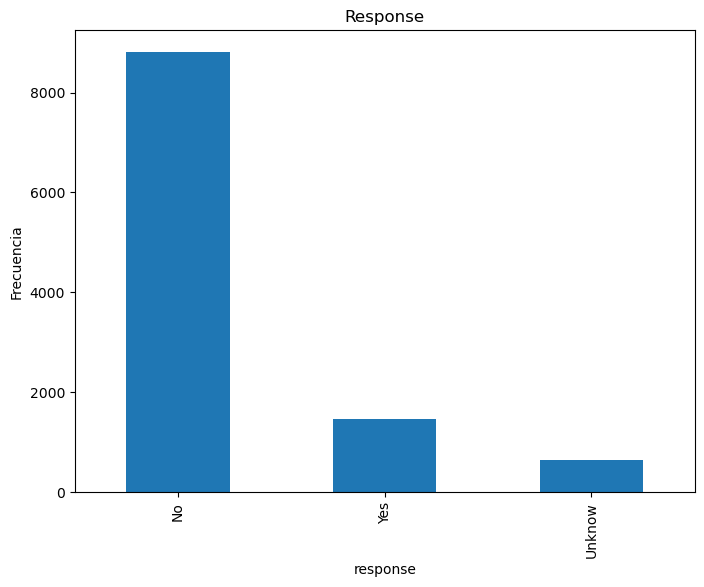

In [8]:
# Seleccionar la columna de interés
columna = 'response'

# Crear un gráfico de barras de la columna de interés
df[columna].value_counts().plot(kind='bar', figsize=(8,6))

# Personalizar el gráfico
plt.title('Response')
plt.xlabel(columna)
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

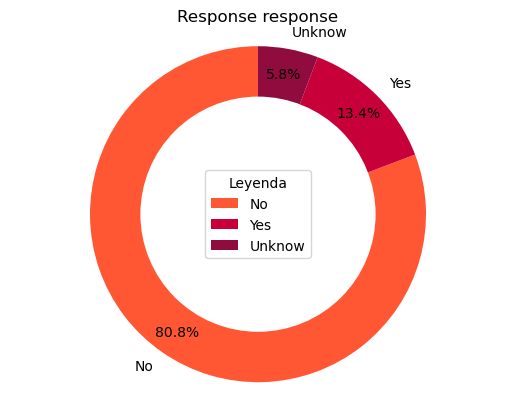

In [9]:
# Contar el número de ocurrencias de cada valor único en la columna de interés
conteo_valores = df[columna].value_counts()

# Definir los valores que se mostrarán en el gráfico
valores = conteo_valores.values

# Definir las etiquetas para cada valor
etiquetas = conteo_valores.index.tolist()

# Definir los colores de cada sección del gráfico
colores = ['#FF5733', '#C70039', '#900C3F']

# Crear el gráfico de dona
plt.pie(valores, colors=colores, labels=etiquetas, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
circulo_central = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo_central)

# Personalizar el gráfico
plt.axis('equal')
plt.title(f'Response {columna}')
plt.legend(title='Leyenda', loc='center')

# Mostrar el gráfico
plt.show()

In [10]:
# Agrupar el DataFrame por la columna 'sales_channel' y contar las respuestas "No"
frecuencias = df.groupby('sales channel')['response'].apply(lambda x: x.str.count('No').sum())
frecuencias2 = df.groupby('sales channel')['response'].apply(lambda x: x.str.count('Yes').sum())
frecuencias3 = df.groupby('sales channel')['response'].apply(lambda x: x.str.count('Unknow').sum())

# Mostrar la frecuencia de respuesta por canal de venta
print(frecuencias)
print(frecuencias2)
print(frecuencias3)

sales channel
Agent          3148
Branch         2539
Call Center    1792
Web            1334
Name: response, dtype: int64
sales channel
Agent          742
Branch         326
Call Center    221
Web            177
Name: response, dtype: int64
sales channel
Agent          231
Branch         157
Call Center    128
Web            115
Name: response, dtype: int64


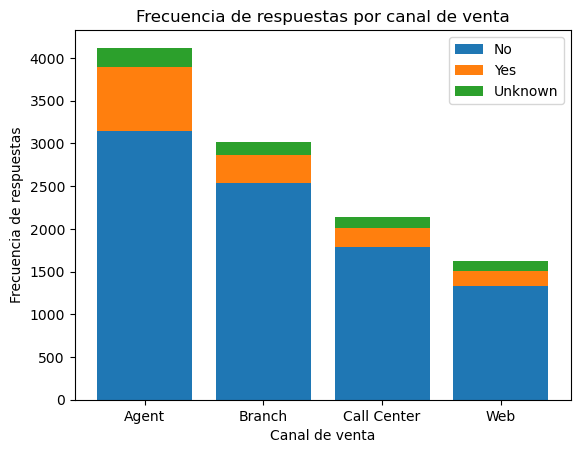

In [11]:
# Graficar las frecuencias en un gráfico de barras apiladas
plt.bar(frecuencias.index, frecuencias, label='No')
plt.bar(frecuencias2.index, frecuencias2, bottom=frecuencias, label='Yes')
plt.bar(frecuencias3.index, frecuencias3, bottom=frecuencias+frecuencias2, label='Unknown')

# Agregar etiquetas a los ejes y título al gráfico
plt.xlabel('Canal de venta')
plt.ylabel('Frecuencia de respuestas')
plt.title('Frecuencia de respuestas por canal de venta')
plt.legend()

# Mostrar el gráfico
plt.show()

- Show a plot of the response rate by the total claim amount.

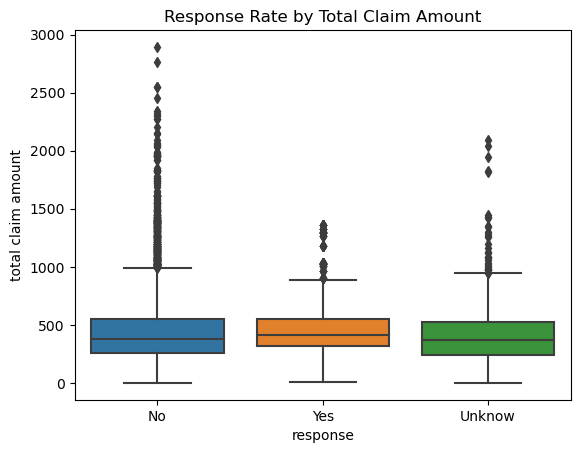

In [16]:
sns.boxplot(x='response', y='total claim amount', data=df)
plt.title('Response Rate by Total Claim Amount')
plt.show()


- Show a plot of the response rate by income.
4. Box.plot

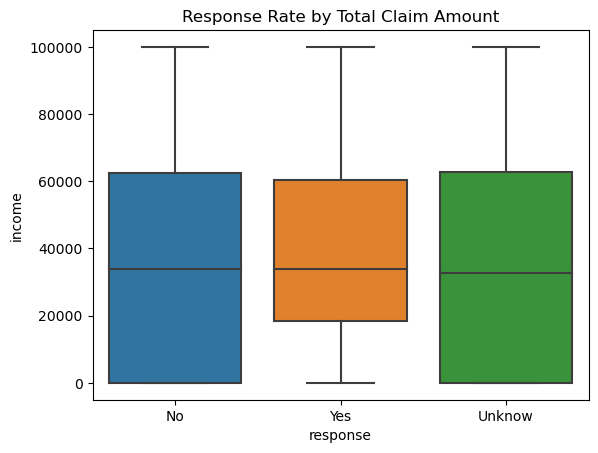

In [17]:
sns.boxplot(x='response', y='income', data=df)
plt.title('Response Rate by Total Claim Amount')
plt.show()